# OBJECTIVE: K-Means Clustering for Iris dataset.
# BY Monisha Karmakar


### Importing Library

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

##### Accessing the Dataset

In [15]:
iris=pd.read_csv("Iris.csv")

#### Doing Stastical analysis

In [16]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
iris.drop("Id", axis=1, inplace=True)


In [21]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Interpretation
#### Here there is 150 observation and 6 Variables
#### Here there is no null value

In [22]:
x=iris.iloc[:,[0,1,2,3]].values

#### Data Visualization


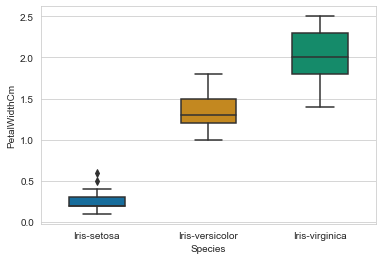

In [34]:
#Boxplots of Petal widths by Different Species of Iris
sns.boxplot(y='PetalWidthCm',x='Species', data=iris, width=0.5, palette="colorblind")

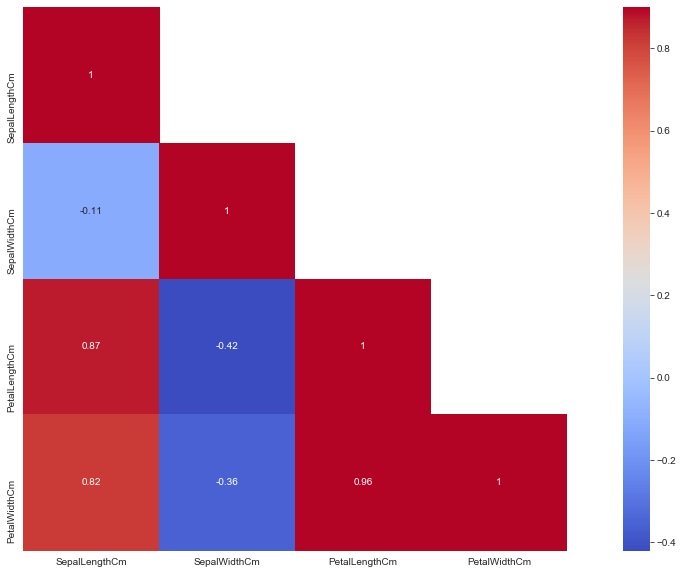

In [33]:
#Generating Correlation Heat map
corr = iris.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="coolwarm")

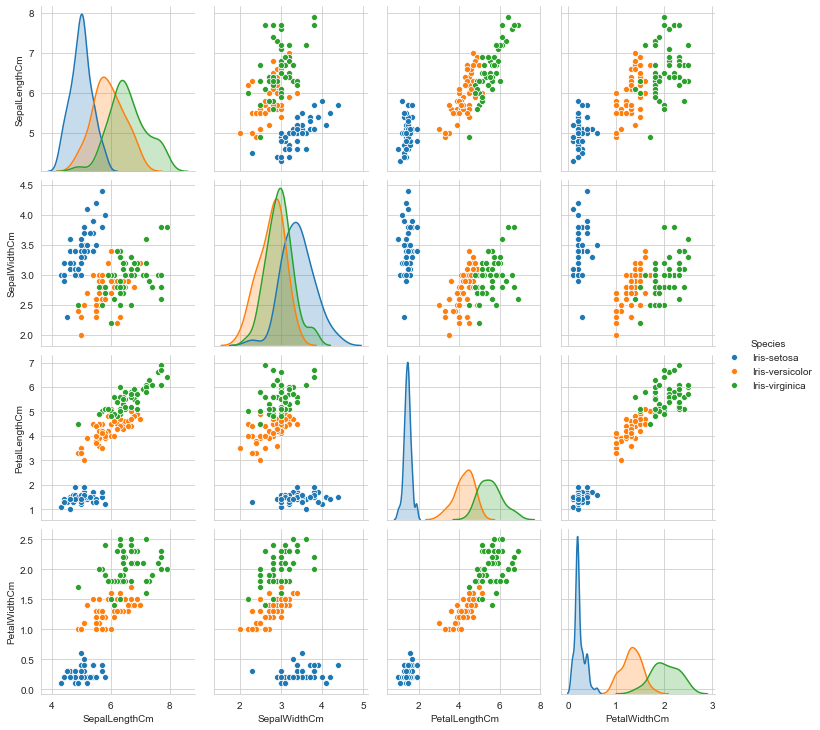

In [40]:
sns.pairplot(iris,hue='Species')

### Doing K-Means Clustering

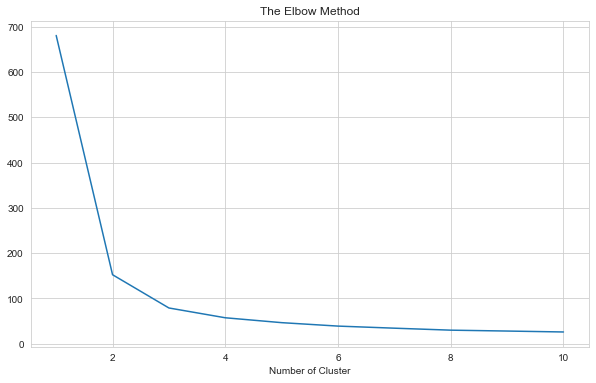

In [25]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.show()

In [27]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = None)
y_kmeans = kmeans.fit_predict(x)

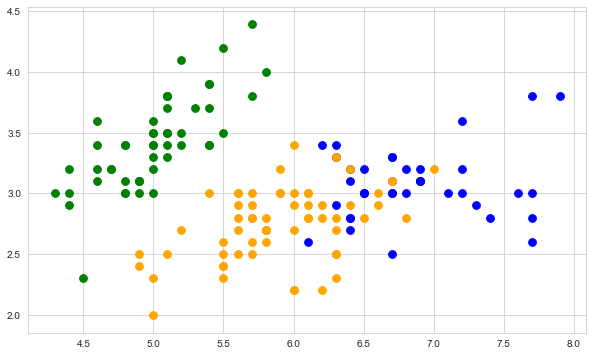

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=60,c="blue",label="Iris-setosa",cmap="rainbow")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=60,c="green",label="Iris-versicolour",cmap="rainbow")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=60,c="orange",label="Iris-virginica",cmap="rainbow")

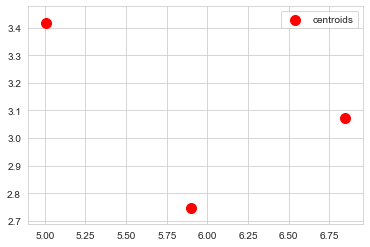

In [41]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="red",label="centroids")
plt.legend()

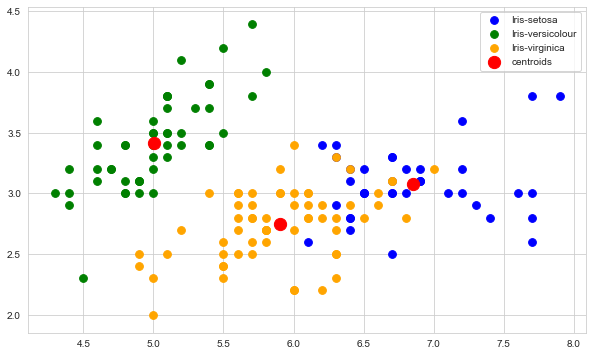

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=60,c="blue",label="Iris-setosa",cmap="rainbow")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=60,c="green",label="Iris-versicolour",cmap="rainbow")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=60,c="orange",label="Iris-virginica",cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c="red",label="centroids")
plt.legend()

### Hence the optimun number of Cluster is 3 here.
